In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
class DFA:
    def __init__(self, states, alphabet, transitions, start_state, accept_states):
        self.states = states
        self.alphabet = alphabet
        self.transitions = transitions
        self.start_state = start_state
        self.accept_states = accept_states

    def run(self, input_string):
        current_state = self.start_state
        for symbol in input_string:
            current_state = self.transitions.get((current_state, symbol), None)
            if current_state is None:
                return False
        return current_state in self.accept_states

In [4]:
def create_dfa():
    states = {'q0', 'q1', 'q2'}
    alphabet = {'0', '1'}
    transitions = {
        ('q0', '0'): 'q1',
        ('q0', '1'): 'q2',
        ('q1', '0'): 'q0',
        ('q1', '1'): 'q1',
        ('q2', '0'): 'q2',
        ('q2', '1'): 'q0'
    }
    start_state = 'q0'
    accept_states = {'q0'}

    return DFA(states, alphabet, transitions, start_state, accept_states)

In [5]:

def display_dfa_table(dfa):
    df = pd.DataFrame(columns=['State'] + list(dfa.alphabet) + ['Accept'])
    
    for state in dfa.states:
        row = [state]
        for symbol in dfa.alphabet:
            next_state = dfa.transitions.get((state, symbol), '-')
            row.append(next_state)
        row.append('Yes' if state in dfa.accept_states else 'No')
        df = df.append(pd.Series(row, index=df.columns), ignore_index=True)
    
    display(df)


In [6]:
def display_dfa_diagram(dfa):
    G = nx.DiGraph()
    for state in dfa.states:
        G.add_node(state)
    for (current_state, symbol), next_state in dfa.transitions.items():
        G.add_edge(current_state, next_state, label=symbol)
    
    pos = nx.spring_layout(G)
    labels = {state: state for state in dfa.states}
    edge_labels = {(current_state, next_state): symbol for (current_state, symbol), next_state in dfa.transitions.items()}

    nx.draw_networkx_nodes(G, pos, nodelist=dfa.states, node_color='skyblue')
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, labels)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.show()


C:\Users\tahsi\AppData\Local\Temp\ipykernel_20428\818748288.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(row, index=df.columns), ignore_index=True)
C:\Users\tahsi\AppData\Local\Temp\ipykernel_20428\818748288.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(row, index=df.columns), ignore_index=True)
C:\Users\tahsi\AppData\Local\Temp\ipykernel_20428\818748288.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(row, index=df.columns), ignore_index=True)


,State,1,0,Accept
0,q1,q1,q0,No
1,q2,q0,q2,No
2,q0,q2,q1,Yes


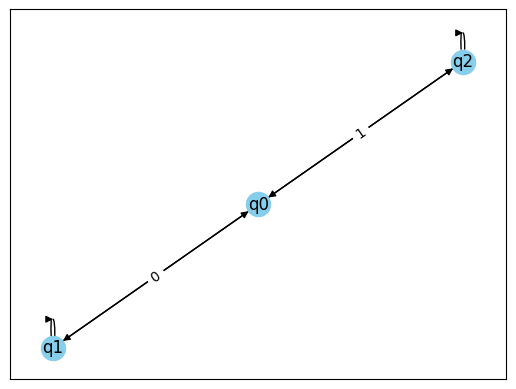

In [7]:
dfa = create_dfa()
display_dfa_table(dfa)
display_dfa_diagram(dfa)